In [1]:
pip install kornia

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.7/705.7 kB 14.5 MB/s eta 0:00:00


In [2]:
import kornia as K
import torch
import cv2
import numpy as np
from PIL import Image
from kornia.feature import LoFTR
import kornia.feature as KF
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from kornia.contrib import ImageStitcher
from kornia.contrib.models.tiny_vit import TinyViT
import torchvision
from kornia.augmentation import AugmentationSequential
from kornia.geometry import bbox_to_mask

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def load_torch_image(file_name):
    image = K.image_to_tensor(cv2.imread(file_name), False).float() / 255
    image = K.color.bgr_to_rgb(image)
    return image


def show_image(tensor):
    image = K.utils.tensor_to_image(tensor)
    plt.imshow(image)
    plt.axis('off')
    plt.show()


def save_tensor_as_image(path, image):
    image.save(path)


def concat_images_h(image1, image2):
    image1 = transforms.ToPILImage()(torch.squeeze(image1))
    image2 = transforms.ToPILImage()(torch.squeeze(image2))
    concatenated_images = Image.new('RGB', (image1.width + image2.width, image1.height))
    concatenated_images.paste(image1, (0, 0))
    concatenated_images.paste(image2, (image1.width, 0))
    return concatenated_images

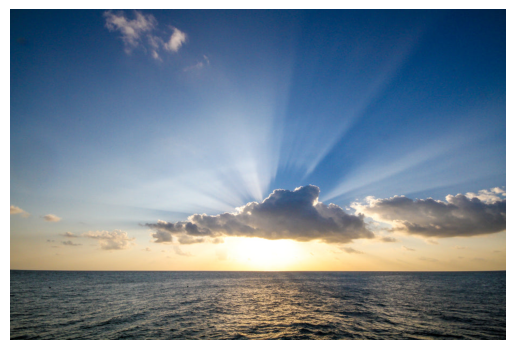

In [5]:
path_to_img = "drive/MyDrive/Colab Notebooks/"
image_1 = load_torch_image(path_to_img + "image_sea.jpg")

show_image(image_1)

In [ ]:
image_contrast = K.enhance.adjust_contrast(image_1, 1.5)

concatenated_images_contrast = concat_images_h(image_1, image_contrast)


#save_tensor_as_image('concatenated_images_contrast.jpg', concatenated_images_contrast)

In [ ]:
image_grayscale = K.color.rgb_to_grayscale(image_1)

concatenated_images_gray = concat_images_h(image_1, image_grayscale)


#save_tensor_as_image('concatenated_images_gray.jpg', concatenated_images_gray)

In [ ]:
image_canny = K.filters.canny(image_1)[0]

concatenated_images_canny = concat_images_h(image_1, image_canny)


#save_tensor_as_image('concatenated_images_canny.jpg', concatenated_images_canny)

In [ ]:
gaussian_blur = K.filters.GaussianBlur2d((5, 5), (4.5, 4.5))

image_gaussian_blur = gaussian_blur(image_1)

concatenated_images_gaussian_blur = concat_images_h(image_1, image_gaussian_blur)

#save_tensor_as_image('concatenated_images_gaussian_blur.jpg', concatenated_images_gaussian_blur)

In [ ]:
image_clahe = K.enhance.equalize_clahe(image_1)

concatenated_images_clahe = concat_images_h(image_1, image_clahe)

#save_tensor_as_image('concatenated_images_clahe.jpg', concatenated_images_clahe)

In [ ]:
image_sepia = K.color.Sepia(rescale=False)(image_1)

concatenated_image_sepia = concat_images_h(image_1, image_sepia)

#save_tensor_as_image('concatenated_image_sepia.jpg', concatenated_image_sepia)

In [ ]:
image_corners = K.feature.CornerHarris(k =0.04, grads_mode='diff')(image_grayscale)

concatenated_image_corners = concat_images_h(image_grayscale, image_corners)

#save_tensor_as_image('concatenated_image_corners.jpg', concatenated_image_corners)

In [6]:
def save_tensor_as_image2(path, image):
    image = transforms.ToPILImage()(torch.squeeze(image))
    image.save(path)

#image_with_line = K.utils.draw_line(torch.squeeze(image_1),torch.tensor([10, 10]), torch.tensor([500, 250]), torch.tensor([1,0,255]))

#simage_with_rectangle = K.utils.draw_rectangle(image_1, torch.tensor([[[10, 10, 400, 400]]]), color=torch.tensor([1,0, 255]), fill=None)

#save_tensor_as_image2('image_with_rectangle.jpg', image_with_rectangle)

#save_tensor_as_image2('image_with_line.jpg', image_with_line)

In [ ]:
kernel = torch.tensor([[0, 1, 0], [1, 1, 1], [0, 1, 0]])

#graded_image = K.morphology.gradient(image_1, kernel)

#save_tensor_as_image2('image_with_morph_grad.jpg', graded_image)

In [ ]:
#opened_image = K.morphology.opening(image_1, kernel)

#save_tensor_as_image2('opened_image.jpg', opened_image)

In [ ]:
closed_image = K.morphology.closing(image_1, kernel)

#save_tensor_as_image2('closed_image.jpg', closed_image)

In [8]:
aug_list = AugmentationSequential(
    K.augmentation.ColorJitter(0.1, 0.1, 0.1, 0.1, p=1.0),
    K.augmentation.RandomAffine(360, [0.1, 0.1], [0.7, 1.2], [30.0, 50.0], p=1.0),
    K.augmentation.RandomPerspective(0.5, p=1.0),
    data_keys=["input"], same_on_batch=False)

augmented_image = aug_list(image_1)

save_tensor_as_image2(path_to_img + 'augmented_image.jpg', augmented_image)

In [8]:
rotated_image = K.geometry.transform.Rotate(torch.tensor([45.]))(image_1)

concatenated_rotated_image = concat_images_h(image_1, rotated_image)

save_tensor_as_image(path_to_img + 'concatenated_rotated_image.jpg', concatenated_rotated_image)